# Exploratory Data Analysis

***This notebook investigates the revised dataset that was the output of the data import process. We combined data from 20 cities into a single dataset and in this notebook will review it for any issues. At the conlcusion, a final cleaned dataset will be exported for use in the modeling phase.***

### Imports and Set-up

In [26]:
# package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# function imports

from data_logic import plot_time_period, target_days, actual_days, missing_days, print_statement, plot_missing, percent_missing

# data import

city_data = pd.read_csv("../05_clean_data/processed_data_revised.csv")

In [27]:
# establish base cities for the exploration

cities = [
    "bakersfield",
    "sanfrancisco",
    "sanjose",
    "aurora",
    "denver",
    "neworleans",
    "baltimore",
    "saintpaul",
    "charlotte",
    "durham",
    "fayetteville",
    "greensboro",
    "raleigh",
    "winston-salem",
    "cincinnati",
    "oklahomacity",
    "houston",
    "sanantonio",
    "seattle",
    "madison",
]

metrics = ["citation_issued", "citation_rate"]
time_periods = ["month", "quarter", "year"]

## Initial Plot

### All cities plotted to end of month

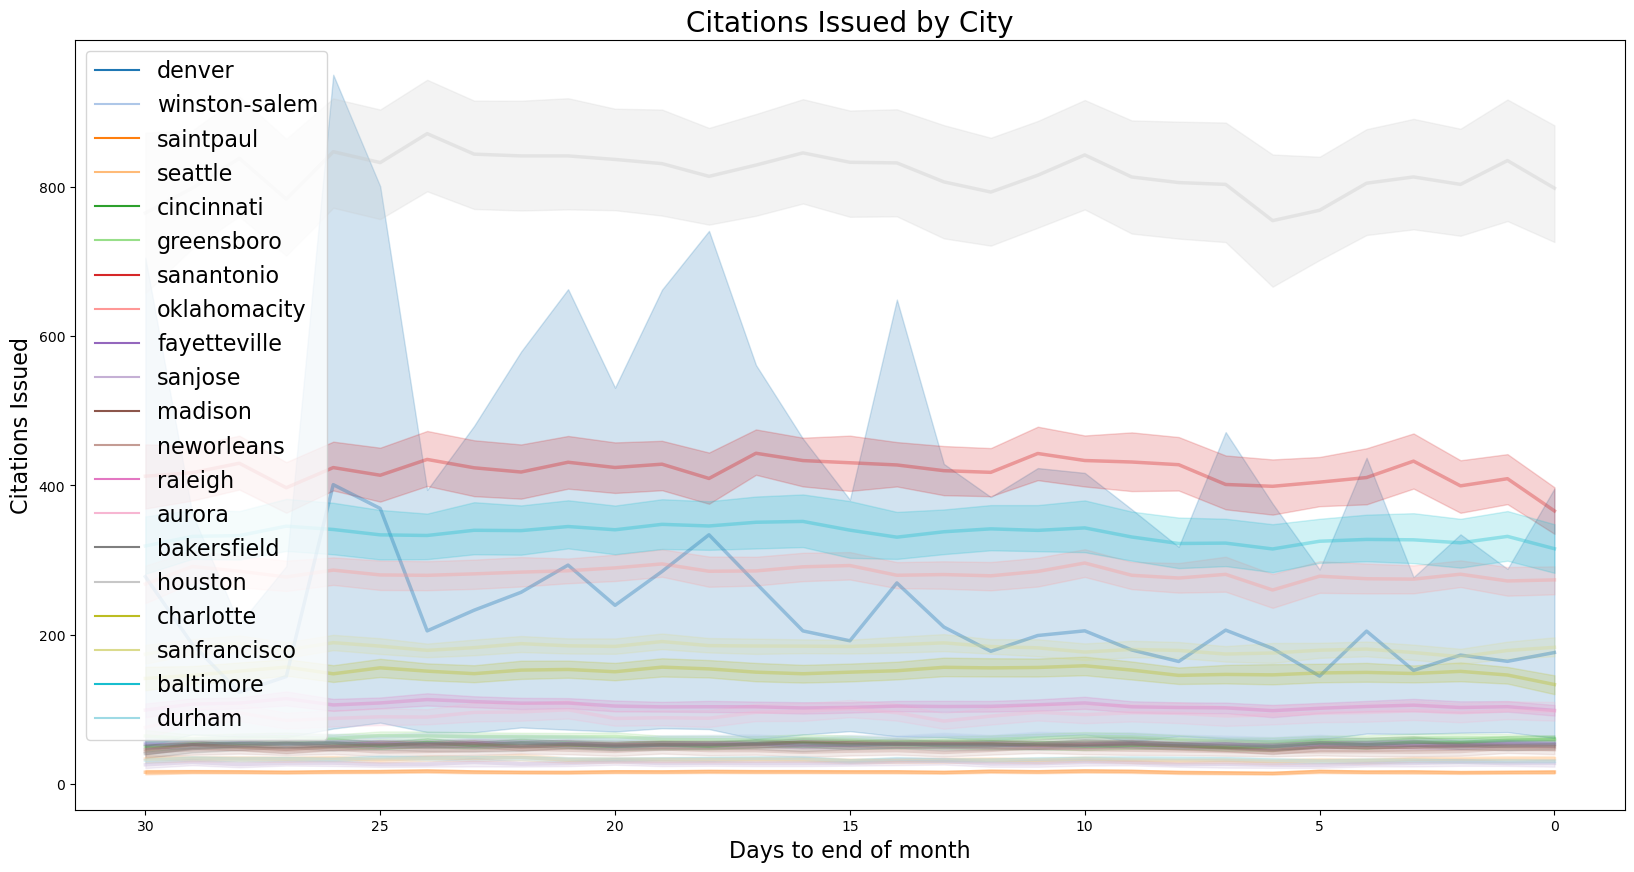

In [28]:
# make the figure
plt.figure(figsize=((20, 10)))

# plot all cities on one plot
sns.lineplot(
    data=city_data,
    x="days_end_month",
    y="citation_issued",
    hue="city",
    palette="tab20",
    linewidth=2.5,
    alpha=0.35,
)

# invert the x-axis
plt.gca().invert_xaxis()

# add a title
plt.title("Citations Issued by City", fontsize=20)

# add axis labels
plt.xlabel("Days to end of month", fontsize=16)
plt.ylabel("Citations Issued", fontsize=16)

# add a legend
plt.legend(fontsize=16, loc="upper left")

plt.show()

**Analysis**

Don't go to Houston, or even San Antonio. Dang.

Denver is really noisy.

## City-by-city Analysis

### Bakersfield (Mar 2008 - Mar 2018)

In [29]:
this_city = cities[0]

In [30]:
# plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

In Bakersfield there does not appear to be an obvious relationship with any of the reporting horizons and the number of citations given when the mean is plotted over the data. The data appear relatively noisy, and would likely beenfit from a LOESS treatment. Bakserfield appears to have only reported citations given, so the rate is inconclusive. Additionally, reporting ended in March 2018, leading to sparseness that year.

### Missing data

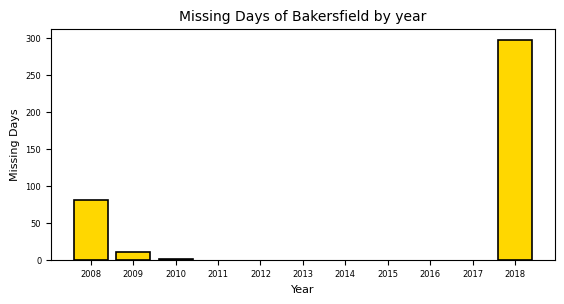

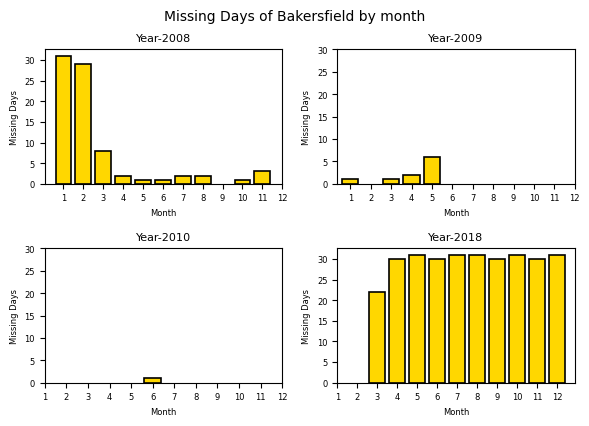

The total missing days of bakersfield are 388 out of 4018 days, or 9.66%.


In [31]:
# RUn the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2008, 2009, and 2018.

> The data from 2010 to 2017 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2010 - 2017**

### San Francisco (Dec 2006 - Jun 2016)

In [32]:
this_city = cities[1]

In [33]:
# plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Data for SF appear generally consistent, with some sparseness in 2016 where the month cut-off was June. There is a significant dip in one of the annual plots that is worth investigating. The rate of citations given appears to be consistent over time and there is no obvious spike observed near a reporting horizon.

### Missing data

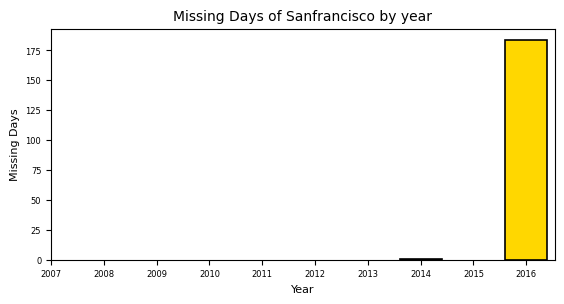

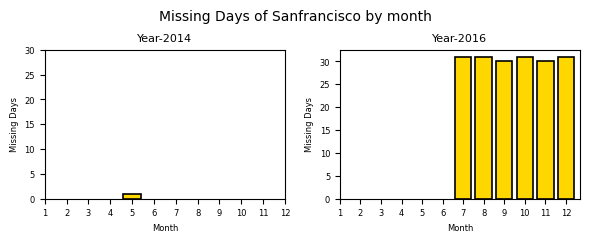

The total missing days of sanfrancisco are 185 out of 3653 days, or 5.06%.


In [34]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2016.

> The data from 2007 to 2015 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2007 - 2015**

### San Jose (Aug 2013 - Mar 2018)

In [35]:
this_city = cities[2]

In [36]:
# plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

San Jose has partial years on either end of the reporting period which is reflected in the data plots. 2013 shows some trends of interest, but the remaining years are unremarkable. The citation rate annual plot also seems to indicate that there amy be missingness in the data due to unusually straight lines.

### Missing data

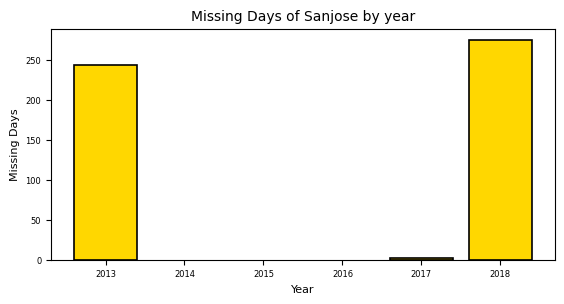

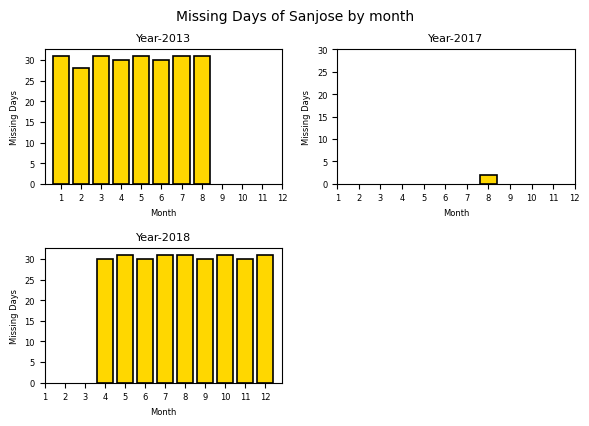

The total missing days of sanjose are 520 out of 2191 days, or 23.73%.


In [37]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop San Jose.

> The data from 2014 - 2016 that has no missing data seems to be not enough to be analyzed.

> **Recomendation: Drop San Jose due to short relative time available for data**

### Aurora (Dec 2011 - Jul 2020)

In [38]:
this_city = cities[3]

In [39]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Aurora shows some very interesting patterns, with generally noisy data across all time periods. The citation rate is useless, as only citations appear to be reported. There is a significant depression in the middle of the fiscal year across basically all years of reporting.

### Missing data

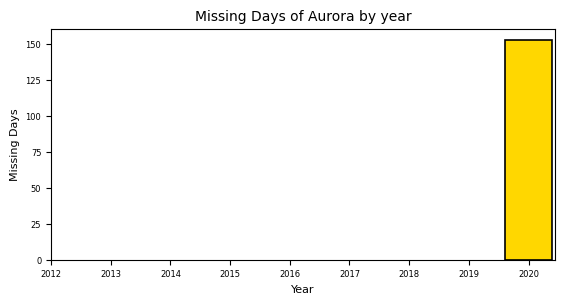

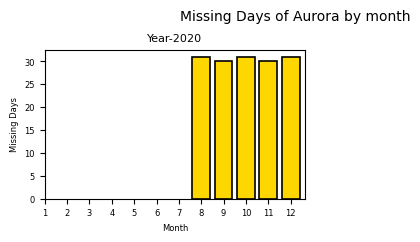

The total missing days of aurora are 153 out of 2923 days, or 5.23%.


In [40]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2020.

> The data from 2012 to 2019 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2012 - 2019**

### Denver (Dec 2010 - Jul 2018)

In [41]:
this_city = cities[4]

In [42]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Denver data appears to have an issue when plotted for the yearly cut-off. Also, 2010 can probably be dropped do to very sparse data. The quarterly data appears to have a very consistent rhythm, which is worth evaluating with fixed effects for day of the week.

### Missing data

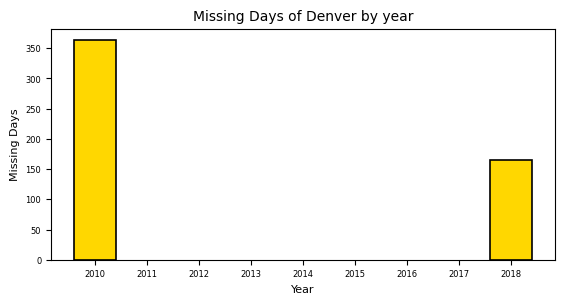

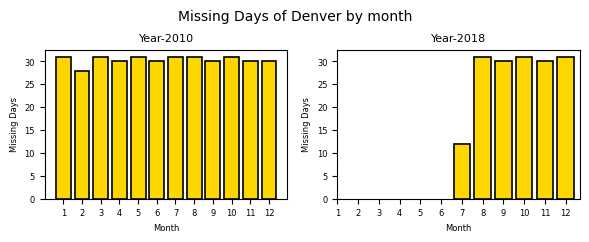

The total missing days of denver are 529 out of 3287 days, or 16.09%.


In [43]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2010 and 2018.

> The data from 2011 to 2017 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2011 - 2017**

### New Orleans (Dec 2009 - Jul 2018)

In [44]:
this_city = cities[5]

In [45]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

New Orleans appears to have generally good data with the exception of the yeras 2010 and 2011. Both years need a further eploration before determining whether to drop or keep this city.

### Missing data

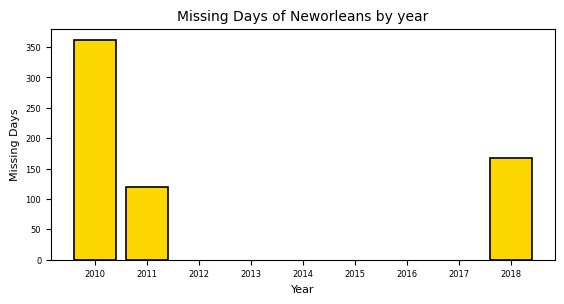

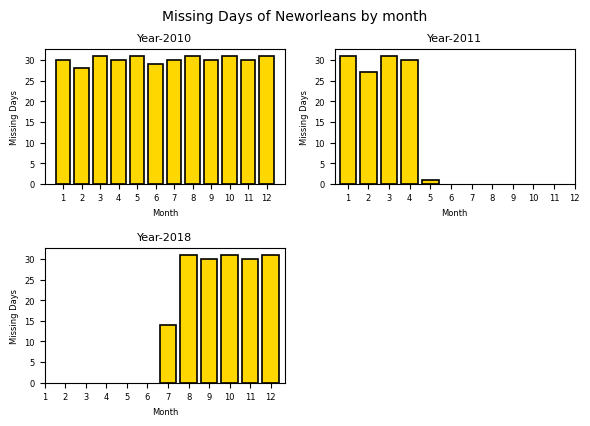

The total missing days of neworleans are 649 out of 3287 days, or 19.74%.


In [46]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2010, 2011, and 2018.

> The data from 2012 to 2017 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2012 - 2017**

### Baltimore (Dec 2010 - Dec 2017)

In [47]:
this_city = cities[6]

In [48]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Citation rates are not useful for Baltimore. Additionally, there appears to be several dates that are obviously missing data or had very little to no police activity. Which woud be very surprising. More investigation is needed.

### Missing data

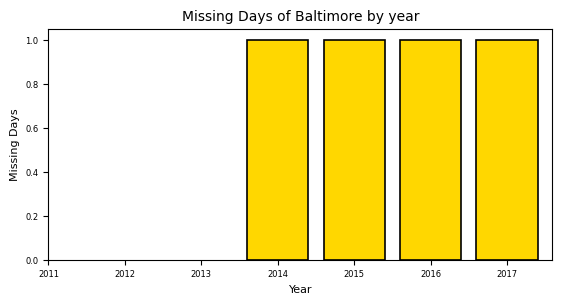

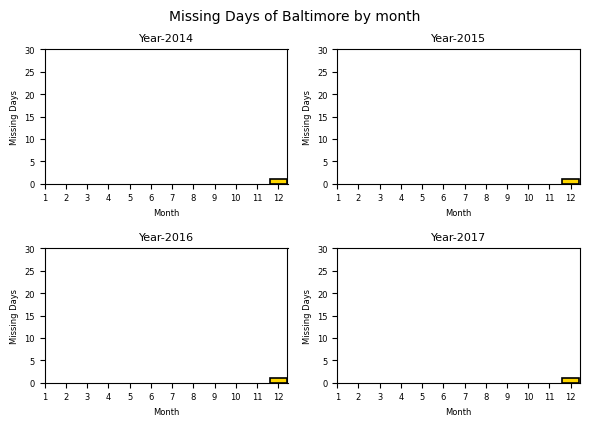

The total missing days of baltimore are 4 out of 2557 days, or 0.16%.


In [49]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Keep everything.

> The amount of missing data seems to be small enough for all data to be kept and analyzed.

> **Recomendation: Keep**

### Saint Paul (Dec 2000 - Dec 2016)

In [50]:
this_city = cities[7]

In [51]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Data for Saint Paul from 2001-2005 appears to have significant issues with missingness. Additionally, 2010 is a very condensed year in terms of reporting. This is an interesting observation not seen in other cities.

### Missing data

In [52]:
city_data[
    (city_data["city"] == "saintpaul")
    & (city_data["year"] == 2001)
    & (city_data["citation_issued"] != 0)
]

,date,total_activity,citation_issued,citation_rate,day_of_week,month,days_end_month,end_of_month,year,days_end_year,end_of_year,quarter,days_end_quarter,end_of_quarter,city,state


> Saintpaul is unique as the year 2001 has no citation issued, so we'll drop 2001 before running the functions.

In [53]:
spec_df_stp = city_data.loc[
    (city_data["city"] == "saintpaul") & (city_data["year"] != 2001), :
]

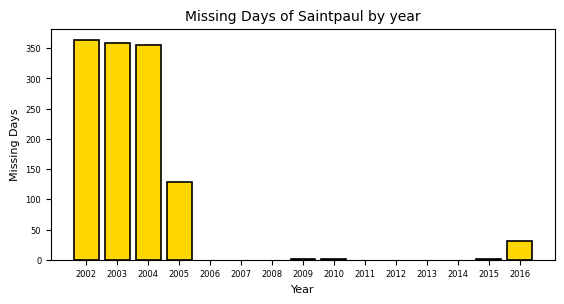

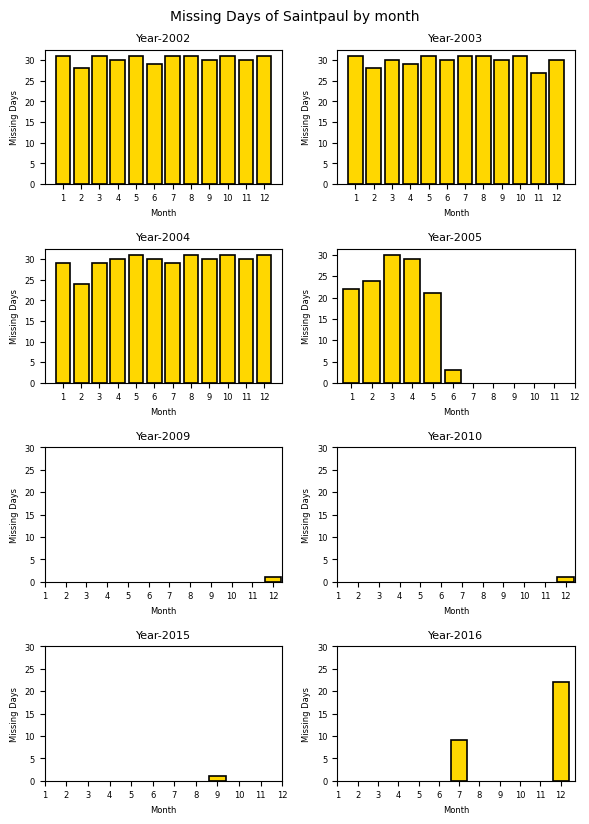

The total missing days of saintpaul are 1241 out of 5479 days, or 22.65%.


In [54]:
# Run the function for this_city
missing_days_year = missing_days(this_city, spec_df_stp, "year")
missing_days_month = missing_days(this_city, spec_df_stp, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city,
    spec_df_stp,
    missing_days_year,
    missing_days_month,
    option="year",
)
plot_missing(
    this_city,
    spec_df_stp,
    missing_days_year,
    missing_days_month,
    option="month",
)
percent_missing(this_city, spec_df_stp, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop Saint Paul.

> The amount of missing data seems to be large enough that makes Saint Paul data questionable and considered to be not analyzed.

> **Recomendation: Drop**

### Charlotte (Dec 1999 - Dec 2015)

In [55]:
this_city = cities[8]

In [56]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2000, 2001, and 2008 appear to have obvious missingness. Additionaly, the citation rate is completely useless as the noise from the data literally carries it to grey out the entire annual plot. There is likely an inconsistency in the reporting that flucuates between all activity and only ticketing activity.

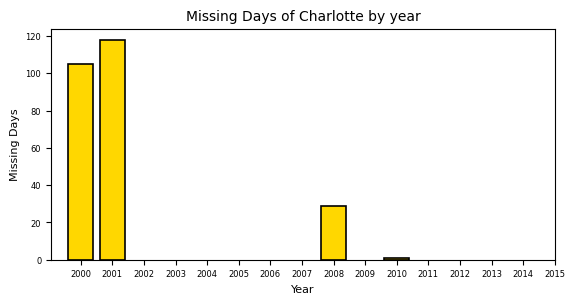

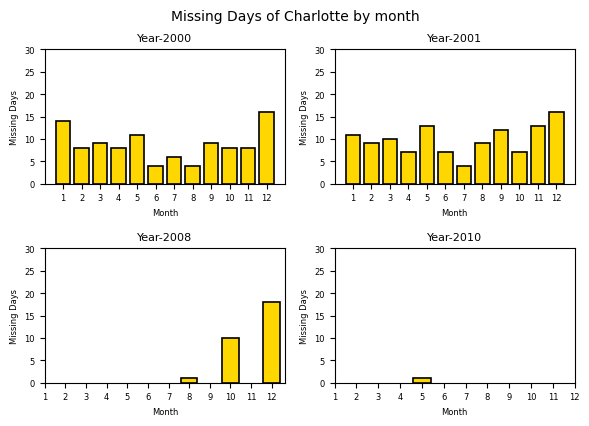

The total missing days of charlotte are 253 out of 5844 days, or 4.33%.


In [57]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop Charlotte.

> The missing on 2008 when there's a financial crisis makes the integrity of the data questionable and considered to be not analyzed.

> **Recomendation: Drop**

### Durham (Dec 2001 - Dec 2015)

In [58]:
this_city = cities[9]

In [59]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2001 can be dropped, it is empty. 2008-2010 show some bizarre activity where there appears to be areas of nearly non-existant activity. This is worth investigating further.

### Missing data

> Durham also has the same case as Saint Paul, where the year 2001 has no citation issued, so we'll drop 2001 before running the functions.

In [60]:
spec_df_drm = city_data.loc[
    (city_data["city"] == "durham") & (city_data["year"] != 2001), :
]

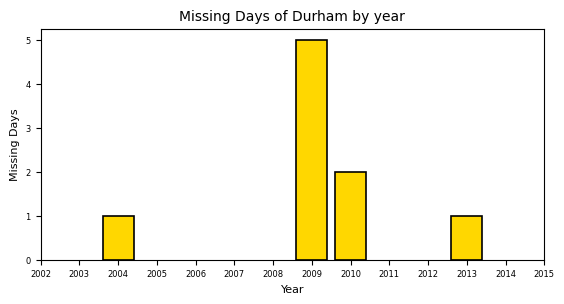

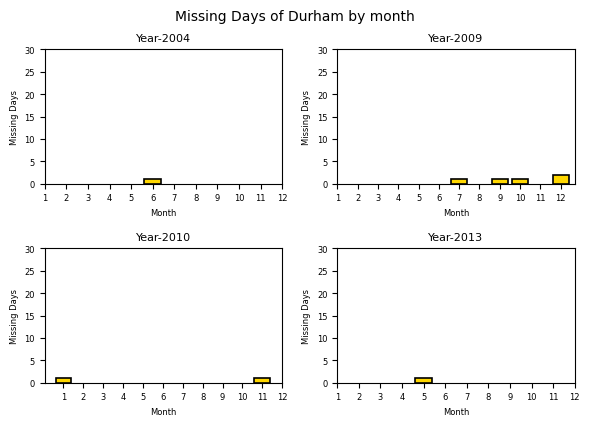

The total missing days of durham are 9 out of 5113 days, or 0.18%.


In [61]:
# Run the function for this_city
missing_days_year = missing_days(this_city, spec_df_drm, "year")
missing_days_month = missing_days(this_city, spec_df_drm, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city,
    spec_df_drm,
    missing_days_year,
    missing_days_month,
    option="year",
)
plot_missing(
    this_city,
    spec_df_drm,
    missing_days_year,
    missing_days_month,
    option="month",
)
percent_missing(this_city, spec_df_drm, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Keep everything.

> The amount of missing data seems to be small enough for all data to be kept and analyzed.

> **Recomendation: Keep**

### Fayetteville (Jan 2000 - Dec 2015)

In [62]:
this_city = cities[10]

In [63]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2000, 2001, and 2009 are all showing indicators of missing values. The remaining time periods appear consistent with the patterns observed in other cities.

### Missing data

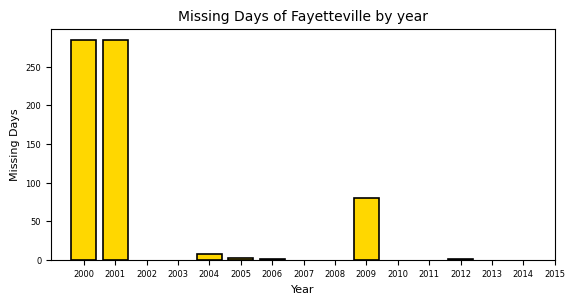

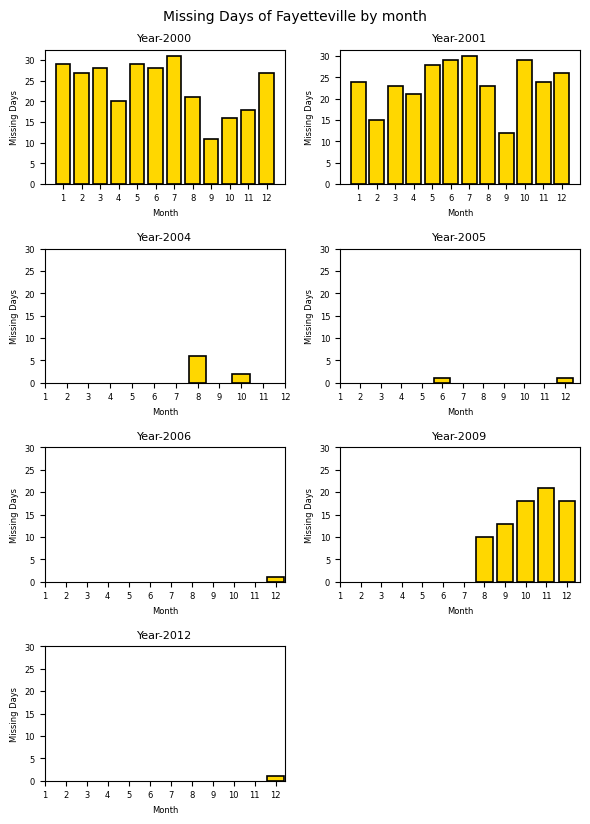

The total missing days of fayetteville are 661 out of 5844 days, or 11.31%.


In [64]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop Fayetteville.

> The missing data on 2009 makes the data integrity questionable and considered to be not analyzed.

> **Recomendation: Drop**

### Greensboro (Jan 2000 - Dec 2015)

In [65]:
this_city = cities[11]

In [66]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2000, 2001, a single month of 2008, and most of 2014 appear to be mising values. The remaining data appears consistent with the patterns observed in other cities.

### Missing data

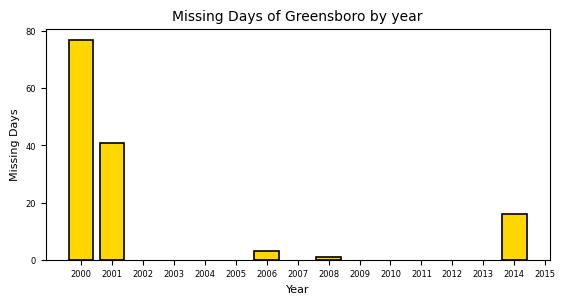

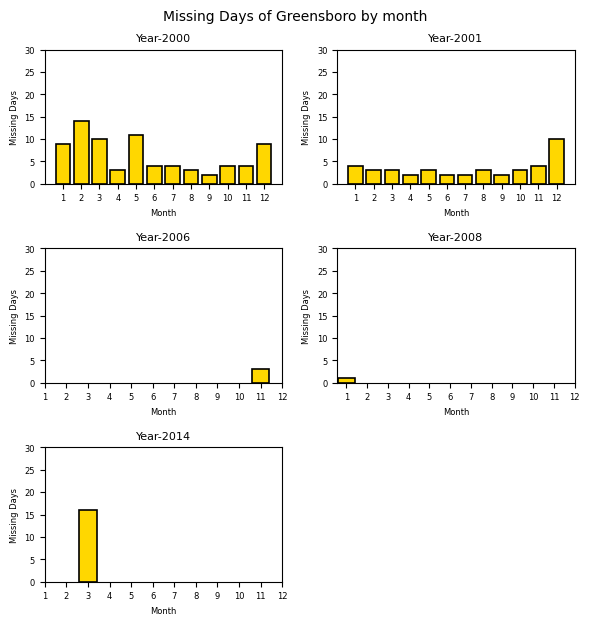

The total missing days of greensboro are 138 out of 5844 days, or 2.36%.


In [67]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop drop 2000, 2001, 2014.

> The missing data on 2006 and 2008 seems to be small enought that it seems reasonable to keep the data from 2002 to 2013 for analysis.

> **Recomendation: Keep 2002 - 2013**

### Raleigh (Dec 2001 - Dec 2015)

In [68]:
this_city = cities[12]

In [69]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Raleigh appears generally clean across all time periods from the plots generated.

### Missing data

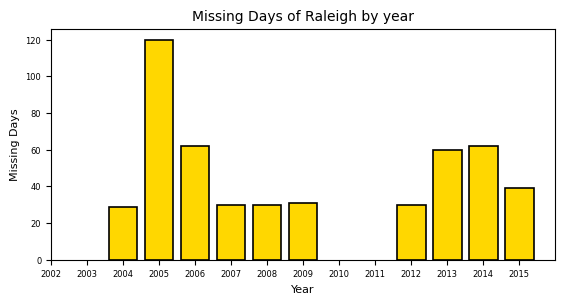

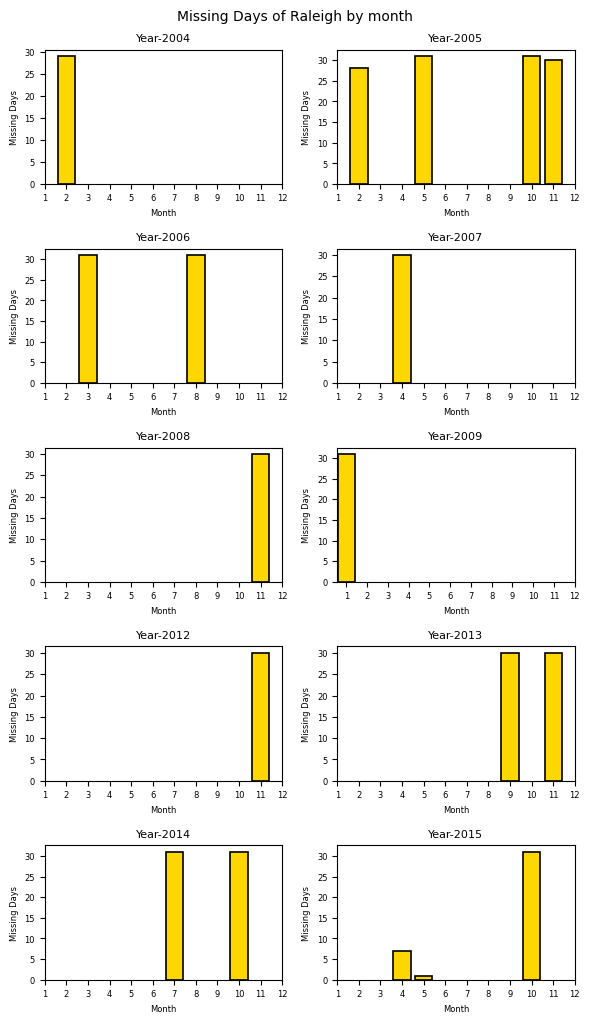

The total missing days of raleigh are 493 out of 5113 days, or 9.64%.


In [70]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop Raleigh.

> The missing data is consistent that makes the integrity questionable and considered to be not analyzed.

> **Recomendation: Drop**

### Winston-Salem (Jan 2000 - Dec 2015)

In [71]:
this_city = cities[13]

In [72]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2000 and 2001 are showing clear signs of issues. Seems to be a theme for the NC cities...

### Missing data

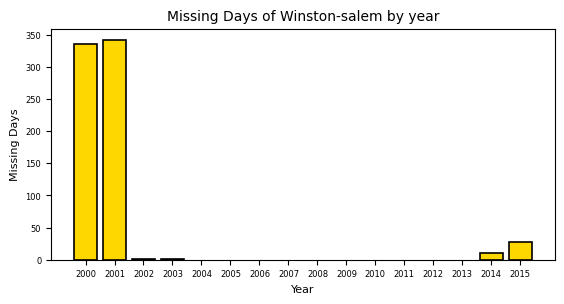

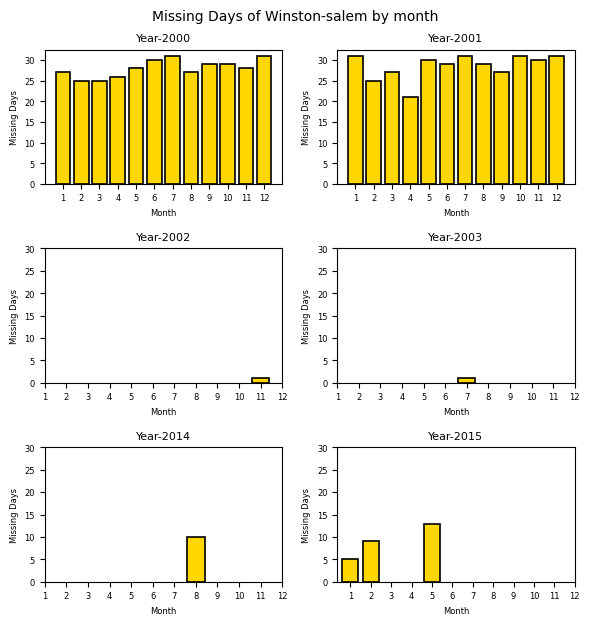

The total missing days of winston-salem are 717 out of 5844 days, or 12.27%.


In [73]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2000, 2001, 2014, 2015.

> The data from 2002 to 2013 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2002 - 2013**

### Cincinnati (Dec 2008 - May 2018)

In [74]:
this_city = cities[14]

In [75]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Cincinnati shows clear signs of increased activity and the end of many monthly periods. This city is worthy of further investigation. The partial year data for 2018 is reflected in the graphs, but worth keeping.

### Missing data

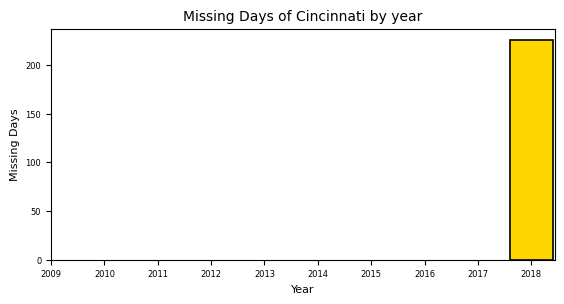

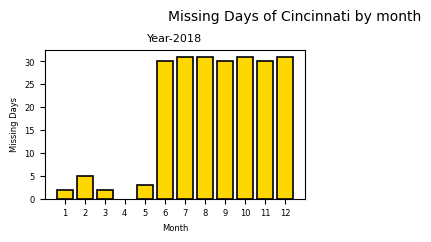

The total missing days of cincinnati are 226 out of 3652 days, or 6.19%.


In [76]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2018.

> The data from 2009 to 2017 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2009 - 2017**

### Oklahoma City (Dec 2010 - Nov 2020)

In [77]:
this_city = cities[15]

In [78]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2011, 2017, and 2020 all show signs of missing data that need to be investigated. Other years are consistent with observed trends in other cities. Citation rate is useless.

### Missing data

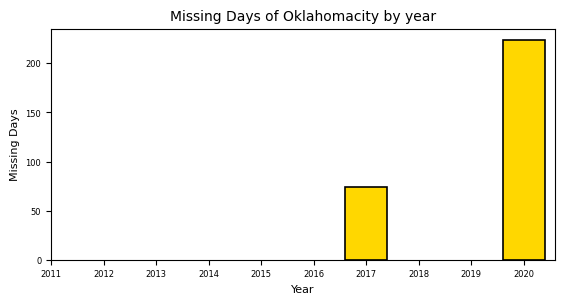

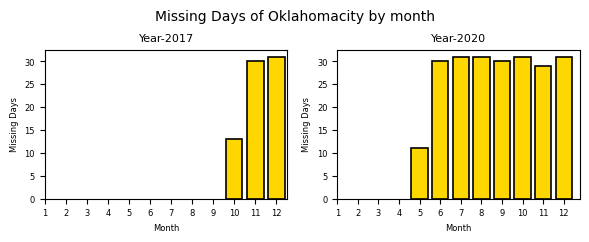

The total missing days of oklahomacity are 298 out of 3653 days, or 8.16%.


In [79]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop Oklahoma City.

> The missing data on 2017 makes the integrity of data on 2018 and 2019 questionable. **Note: unless we want to analyze 2011 - 2016.

> **Recomendation: Keep 2011 - 2016**

### Houston (Dec 2013 - Nov 2020)

In [80]:
this_city = cities[16]

In [81]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

Houston gives A LOT of citations

### Missing data

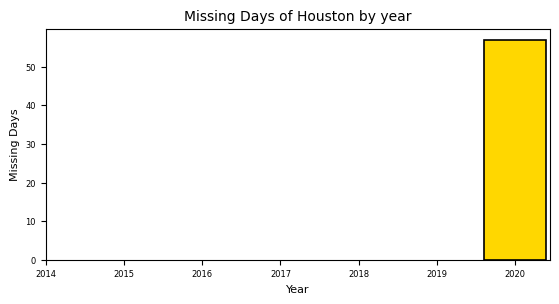

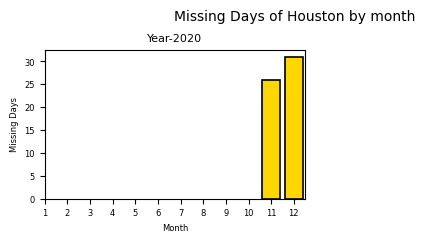

The total missing days of houston are 57 out of 2557 days, or 2.23%.


In [82]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2020.

> The data from 2014 to 2019 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2014 - 2019**

### San Antonio (Dec 2011 - Jun 2020)

In [83]:
this_city = cities[17]

In [84]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

The data appears to be pretty good with the exception of 2020 where the year is partial. Citation rate is useless. And they sure give a lot of citations in San Antonio.

### Missing data

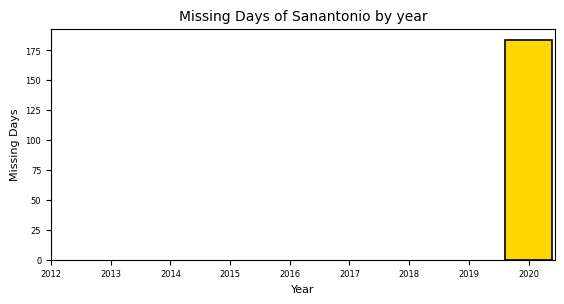

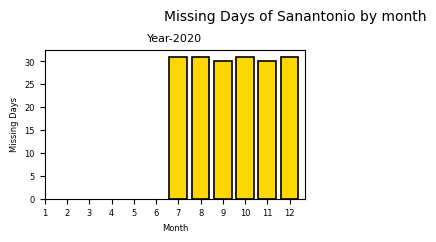

The total missing days of sanantonio are 184 out of 3288 days, or 5.6%.


In [85]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2020.

> The data from 2012 to 2019 seems reasonable to be kept and analyzed.

> **Recomendation: Keep 2012 - 2019**

### Seattle (Dec 2005 - Dec 2015)

In [86]:
this_city = cities[18]

In [87]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

There is some noise which raises questions about possibly missing data. There is also a suspect dip in the middle of the fiscal year in both citations issued and the citation rate that could be worth investigating.

### Missing data

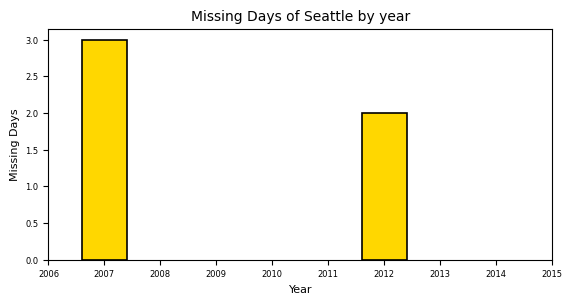

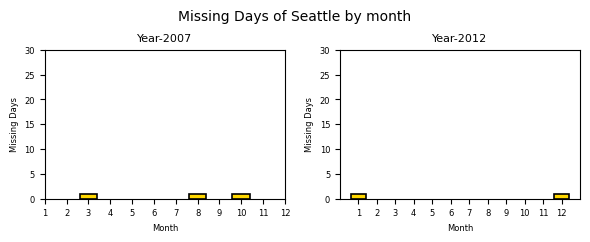

The total missing days of seattle are 5 out of 3652 days, or 0.14%.


In [88]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Keep all data.

> The missing data is in small amount, seems reasonable for all data to be kept and analyzed.

> **Recomendation: Keep**

### Madison (Sep 2007 - Jun 2020)

In [89]:
this_city = cities[19]

In [90]:
# # plot data trends

# for metric in metrics:

#     for time_period in time_periods:

#         plot_time_period(this_city, time_period, city_data, metric)

**Analysis**

2007 and 2020 are partial years, and the data reflects this. Otherwise, most years appear to be within normal ranges of each other and the patterns are unremarkable. In general, there is a lot of something happening in the middle of the fiscal year and right at the beginning. And by something, it looks like not a whole lot of anything.

### Missing data

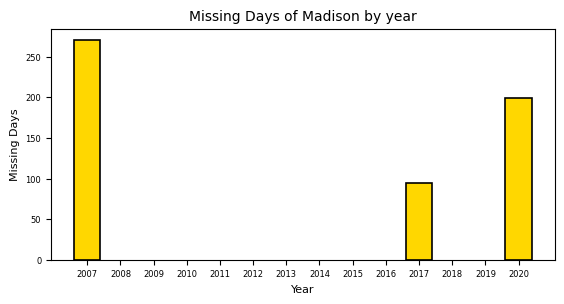

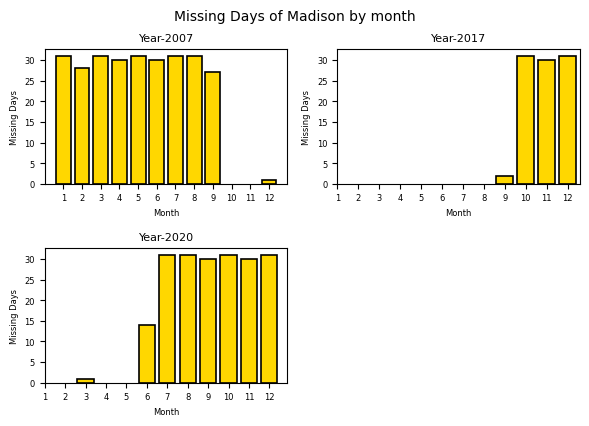

The total missing days of madison are 564 out of 5114 days, or 11.03%.


In [91]:
# Run the function for this_city
missing_days_year = missing_days(this_city, city_data, "year")
missing_days_month = missing_days(this_city, city_data, "month")
# print_statement(this_city, missing_days_year, missing_days_month)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="year"
)
plot_missing(
    this_city, city_data, missing_days_year, missing_days_month, option="month"
)
percent_missing(this_city, city_data, missing_days_year, missing_days_month)

> Recommendation based on the missing data: Drop 2007, 2017 - 2020.

> The data from 2008 to 2016 seems reasonable to be kept and analyzed. The reason to drop 2018 and 2019 because it seems unreliable due to the missing data in 2017.

> **Recomendation: Keep 2008 - 2016**

## Final Dataset Generation

We make the following recommendations based on our observations:

- Bakersfield: 2010 - 2017
- San Francisco: 2007 - 2015
- San Jose: Drop
- Aurora: 2012 - 2019
- Denver: 2011 - 2017
- New Orleans: 2012 - 2017
- Baltimore: 2011 - 2017
- Saint Paul: Drop
- Charlotte: Drop
- Durham: 2002 - 2015
- Fayetteville: Drop
- Greensboro: 2002 - 2013
- Raleigh: Drop
- Winston-Salem: 2002 - 2013
- Cincinnati: 2009 - 2017
- Oklahoma City: 2011 - 2016
- Houston: 2014 - 2019
- San Antonio: 2012 - 2019
- Seattle: 2006 - 2015
- Madison: 2008 - 2016


In [92]:
drop_cities =[
    'sanjose',
    'saintpaul',
    'charlotte',
    'fayetteville',
    'raleigh',
    ]

In [94]:
# subset city_data to remove the drop_cities
city_data = city_data[~city_data['city'].isin(drop_cities)]

assert len(city_data['city'].unique()) == 15

In [107]:
# now we drop years outside these ranges for each city
# bakersfield: 2010 - 2017
bakersfield = city_data[city_data['city'] == 'bakersfield'].copy()
bakersfield = bakersfield[(bakersfield['year'] >= 2010) & (bakersfield['year'] <= 2017)]

# sanfrancisco: 2007 - 2015
sanfrancisco = city_data[city_data['city'] == 'sanfrancisco'].copy()
sanfrancisco = sanfrancisco[(sanfrancisco['year'] >= 2007) & (sanfrancisco['year'] <= 2015)]

# aurora: 2012 - 2019
aurora = city_data[city_data['city'] == 'aurora'].copy()
aurora = aurora[(aurora['year'] >= 2012) & (aurora['year'] <= 2019)]

# denver: 2011 - 2017
denver = city_data[city_data['city'] == 'denver'].copy()
denver = denver[(denver['year'] >= 2011) & (denver['year'] <= 2017)]

# neworleans: 2012 - 2017
neworleans = city_data[city_data['city'] == 'neworleans'].copy()
neworleans = neworleans[(neworleans['year'] >= 2012) & (neworleans['year'] <= 2017)]

# baltimore: 2011 - 2017
baltimore = city_data[city_data['city'] == 'baltimore'].copy()
baltimore = baltimore[(baltimore['year'] >= 2011) & (baltimore['year'] <= 2017)]

# durham: 2002 - 2015
durham = city_data[city_data['city'] == 'durham'].copy()
durham = durham[(durham['year'] >= 2002) & (durham['year'] <= 2015)]

# greensboro: 2002 - 2013
greensboro = city_data[city_data['city'] == 'greensboro'].copy()
greensboro = greensboro[(greensboro['year'] >= 2002) & (greensboro['year'] <= 2013)]

# winston-salem: 2002 - 2013
winstonsalem = city_data[city_data['city'] == 'winston-salem'].copy()
winstonsalem = winstonsalem[(winstonsalem['year'] >= 2002) & (winstonsalem['year'] <= 2013)]

# cincinnati: 2009 - 2017
cincinnati = city_data[city_data['city'] == 'cincinnati'].copy()
cincinnati = cincinnati[(cincinnati['year'] >= 2009) & (cincinnati['year'] <= 2017)]

# oklahomacity: 2011 - 2016
oklahomacity = city_data[city_data['city'] == 'oklahomacity'].copy()
oklahomacity = oklahomacity[(oklahomacity['year'] >= 2011) & (oklahomacity['year'] <= 2016)]

# houston: 2014 - 2019
houston = city_data[city_data['city'] == 'houston'].copy()
houston = houston[(houston['year'] >= 2014) & (houston['year'] <= 2019)]

# sanantonio: 2012 - 2019
sanantonio = city_data[city_data['city'] == 'sanantonio'].copy()
sanantonio = sanantonio[(sanantonio['year'] >= 2012) & (sanantonio['year'] <= 2019)]

# seattle: 2006 - 2015
seattle = city_data[city_data['city'] == 'seattle'].copy()
seattle = seattle[(seattle['year'] >= 2006) & (seattle['year'] <= 2015)]

# madison: 2008 - 2016
madison = city_data[city_data['city'] == 'madison'].copy()
madison = madison[(madison['year'] >= 2008) & (madison['year'] <= 2016)]


In [108]:
# reassemble the dataframe as clean_city_data
clean_city_data = pd.concat([bakersfield, sanfrancisco, aurora, denver, neworleans, baltimore, durham, greensboro, winstonsalem, cincinnati, oklahomacity, houston, sanantonio, seattle, madison])

assert len(clean_city_data['city'].unique()) == 15

In [109]:
# export clean city data   
clean_city_data.to_csv('../05_clean_data/processed_data_clean_final.csv', index=False)